## Preprocessing

In [49]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

In [50]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [51]:
df = pd.read_csv('./data/final/01_phylum_dedornot_ra.csv')

In [52]:
df.head()

,Index,Patient=1,Acidobacteria,Actinobacteria,Armatimonadetes_unclassified,Bacteroidetes,Chlamydiae,Chloroflexi,Cyanobacteria,DeinococcusThermus,...,Synergistetes,Tenericutes,Thermotogae,Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.0,0.172532,0.0,0.143556,0.0,0.0,0.03493,0.051336,...,0.0,0.0,0.0,0.000000,1,65,0,0,NaN,NaN
1,P2,1,0.0,0.705676,0.0,0.010717,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.000000,1,67,0,0,31.25,17.0
2,P3,1,0.0,0.146592,0.0,0.048312,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.032032,1,33,0,0,33.30,16.0
3,P4,1,0.0,0.142101,0.0,0.029968,0.0,0.0,0.00000,0.013363,...,0.0,0.0,0.0,0.000000,1,66,0,0,93.75,21.0
4,P5,1,0.0,0.443562,0.0,0.079860,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.000000,0,69,0,0,6.25,7.0


In [53]:
df.iloc[:,2:26]

,Acidobacteria,Actinobacteria,Armatimonadetes_unclassified,Bacteroidetes,Chlamydiae,Chloroflexi,Cyanobacteria,DeinococcusThermus,Elusimicrobia,Euryarchaeota,...,NA,Nitrospirae,Parcubacteria_unclassified,Proteobacteria,Saccharibacteria_unclassified,Spirochaetae,Synergistetes,Tenericutes,Thermotogae,Verrucomicrobia
0,0.0,0.172532,0.0,0.143556,0.0,0.0,0.034930,0.051336,0.054379,0.000000,...,0.0,0.0,0.0,0.249735,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.705676,0.0,0.010717,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.055438,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.146592,0.0,0.048312,0.0,0.0,0.000000,0.000000,0.000000,0.011846,...,0.0,0.0,0.0,0.179285,0.0,0.000000,0.0,0.0,0.0,0.032032
3,0.0,0.142101,0.0,0.029968,0.0,0.0,0.000000,0.013363,0.000000,0.000000,...,0.0,0.0,0.0,0.387404,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.443562,0.0,0.079860,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.175069,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.642054,0.0,0.020378,0.0,0.0,0.010520,0.003771,0.000000,0.000000,...,0.0,0.0,0.0,0.136297,0.0,0.003573,0.0,0.0,0.0,0.000000
87,0.0,0.487164,0.0,0.000529,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.025473,0.0,0.000000,0.0,0.0,0.0,0.000000
88,0.0,0.282840,0.0,0.004963,0.0,0.0,0.000662,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.655681,0.0,0.000000,0.0,0.0,0.0,0.000000
89,0.0,0.623379,0.0,0.003969,0.0,0.0,0.000066,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.009196,0.0,0.000000,0.0,0.0,0.0,0.000000


In [54]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [55]:
X = df.iloc[:,2:26]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [56]:
clfxgb = XGBClassifier(random_state=42)
#looxgb = LeaveOneOut()
scoring = ['accuracy', 'f1', 'precision', 'recall']
xgb_scores = cross_validate(clfxgb, X, y, cv=5, scoring=scoring, return_estimator=True)


In [57]:
xgb_scores

{'fit_time': array([0.06173468, 0.04522777, 0.04258299, 0.04748631, 0.04089212]),
 'score_time': array([0.01000595, 0.0100193 , 0.01002097, 0.01204562, 0.01201677]),
 'estimator': [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=42, ...),
  XGBClassifier(base_score=None, booster=N

In [58]:
xgb_scores['test_accuracy']

array([0.63157895, 0.44444444, 0.77777778, 0.61111111, 0.77777778])

In [59]:
print(f'Accuracy XGB: ', np.mean(xgb_scores['test_accuracy']))
print(f'F1 score XGB: ', np.mean(xgb_scores['test_f1']))
print(f'Precision XGB: ', np.mean(xgb_scores['test_precision']))
print(f'Recall XGB: ', np.mean(xgb_scores['test_recall']))

Accuracy XGB:  0.6485380116959064
F1 score XGB:  0.7488170444692184
Precision XGB:  0.7168831168831169
Recall XGB:  0.7871794871794872


In [60]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [61]:
feature_importances_complete.shape

(120, 1)

In [62]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [63]:
fic[:15]

,Importance
Cyanobacteria,0.177690
Bacteroidetes,0.175443
Fusobacteria,0.135360
DeinococcusThermus,0.127377
Proteobacteria,0.124058
Firmicutes,0.120591
Actinobacteria,0.091081
Verrucomicrobia,0.048400
Nitrospirae,0.000000
Thermotogae,0.000000


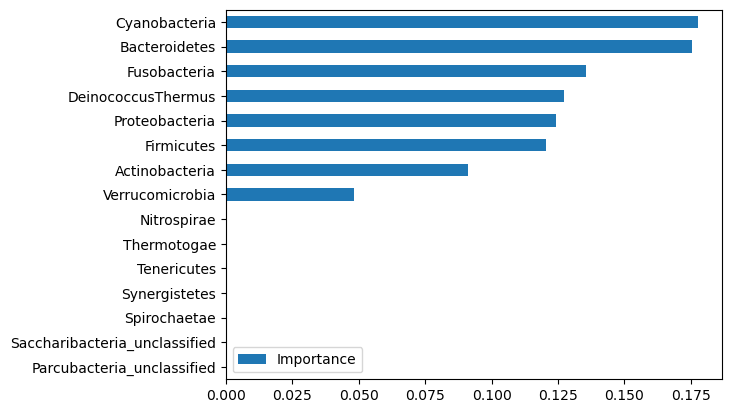

In [64]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [65]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

[10:00:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [66]:
np.shape(shap_valuesxgb)

(91, 24)

In [67]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [68]:
np.shape(shap_valuesxgb_mean)

(1, 24)

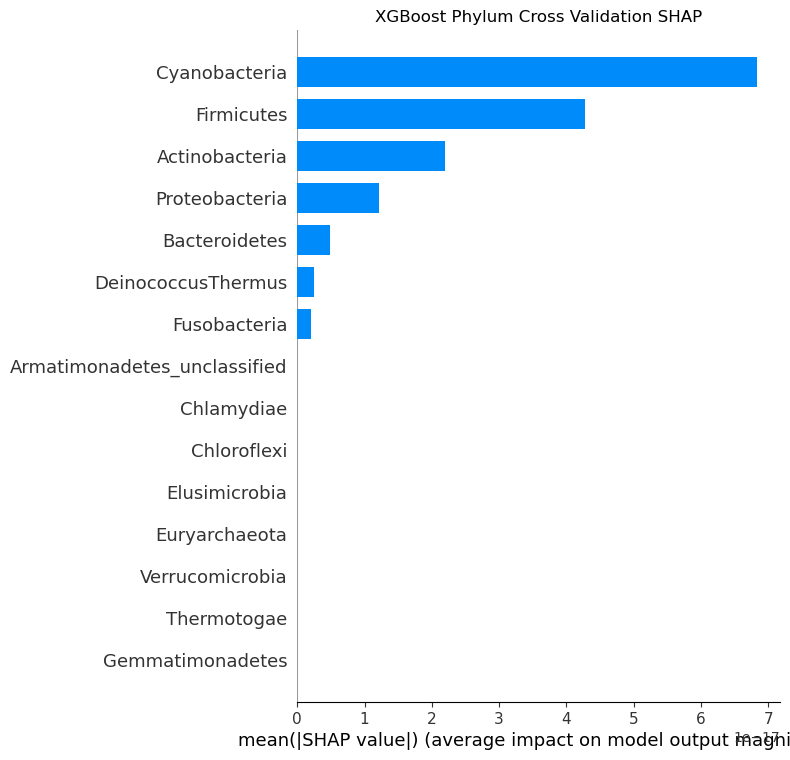

In [69]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('XGBoost Phylum Cross Validation SHAP')
plt.show()

### LightGBM

In [70]:
clflgbm = LGBMClassifier(random_state=42)
#loolgbm = LeaveOneOut()
scoring = ['accuracy', 'f1', 'precision', 'recall']
lgbm_scores = cross_validate(clflgbm, X, y, cv=5, scoring=scoring, verbose=False, return_estimator=True)

[LightGBM] [Info] Number of positive: 48, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [71]:
#lgbm_scores['test_score']

In [72]:
print(f'Accuracy LGBM: ', np.mean(lgbm_scores['test_accuracy']))
print(f'F1 score LGBM: ', np.mean(lgbm_scores['test_f1']))
print(f'Precision LGBM: ', np.mean(lgbm_scores['test_precision']))
print(f'Recall LGBM: ', np.mean(lgbm_scores['test_recall']))

Accuracy LGBM:  0.6818713450292397
F1 score LGBM:  0.7859616858237548
Precision LGBM:  0.719931049342814
Recall LGBM:  0.8705128205128204


In [73]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [74]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [75]:
fic_lgb[:15]

,Importance
Bacteroidetes,53.8
Proteobacteria,42.2
Firmicutes,35.0
Cyanobacteria,33.6
Actinobacteria,23.2
Acidobacteria,0.0
NA,0.0
Thermotogae,0.0
Tenericutes,0.0
Synergistetes,0.0


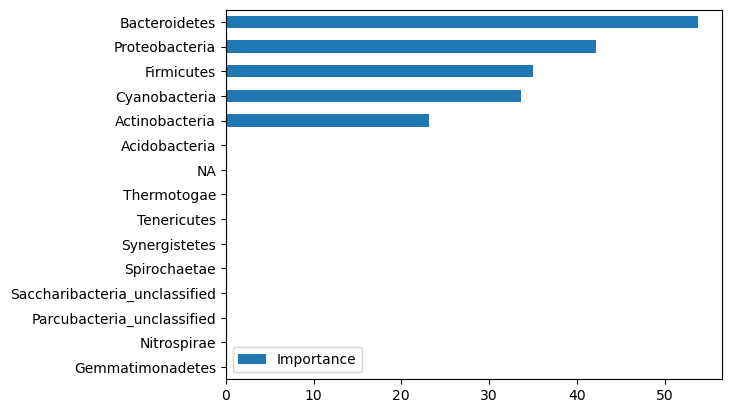

In [76]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [77]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [78]:
np.shape(shap_valueslgb)

(91, 24)

In [79]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [80]:
np.shape(shap_valueslgb_mean)

(1, 24)

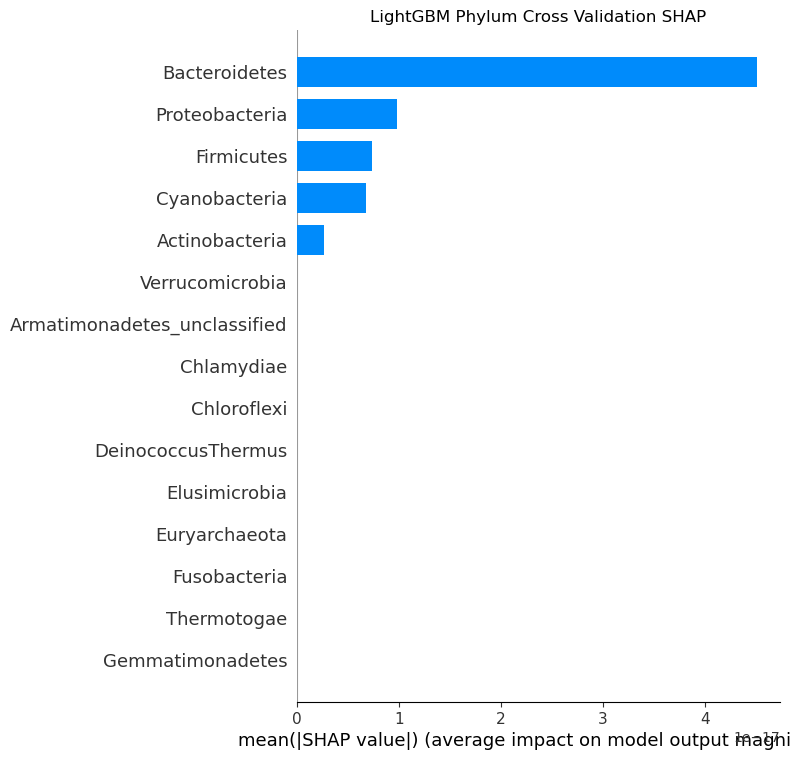

In [81]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('LightGBM Phylum Cross Validation SHAP')
plt.show()

### Multilayer perceptron 

In [82]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

#loomlp = LeaveOneOut()
scoring = ['accuracy', 'f1', 'precision', 'recall']
mlp_scores = cross_validate(clfmlp, X, y, cv=5, scoring=scoring, return_estimator=True)

In [83]:
#mlp_scores['test_score']

In [84]:
print(f'Accuracy MLP: ', np.mean(mlp_scores['test_accuracy']))
print(f'F1 score MLP: ', np.mean(mlp_scores['test_f1']))
print(f'Precision MLP: ', np.mean(mlp_scores['test_precision']))
print(f'Recall MLP: ', np.mean(mlp_scores['test_recall']))

Accuracy MLP:  0.6152046783625731
F1 score MLP:  0.7418598637189342
Precision MLP:  0.6746212121212121
Recall MLP:  0.8358974358974359


In [85]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    #print(f'The most important features for estimator {idx}:')
    #print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [86]:
MLPfeatures.shape

(24, 2)

In [87]:
MLP_feature_importances_complete.shape

(120, 2)

In [88]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [89]:
fic_mlp.shape

(24, 1)

In [90]:
fic_mlp[:15]

,Importance
Features,
Firmicutes,0.124725
Actinobacteria,0.120879
Proteobacteria,0.033516
Cyanobacteria,0.031868
Fusobacteria,0.008242
Verrucomicrobia,0.004945
Elusimicrobia,0.002198
Tenericutes,0.002198
Synergistetes,0.001099


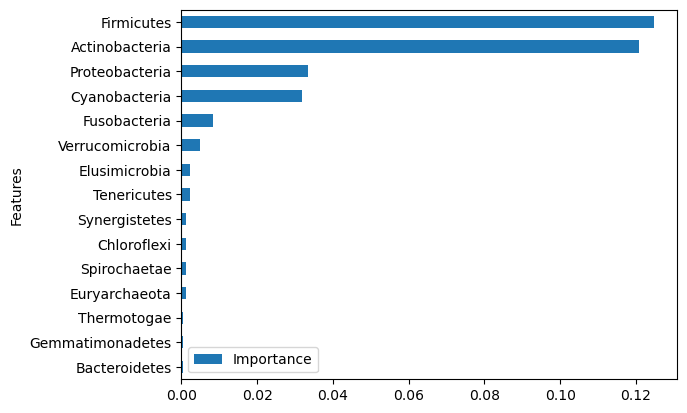

In [91]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [92]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

In [93]:
np.shape(shap_valuesmlp)

(91, 24)

In [94]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [95]:
np.shape(shap_valuesmlp_mean)

(1, 24)

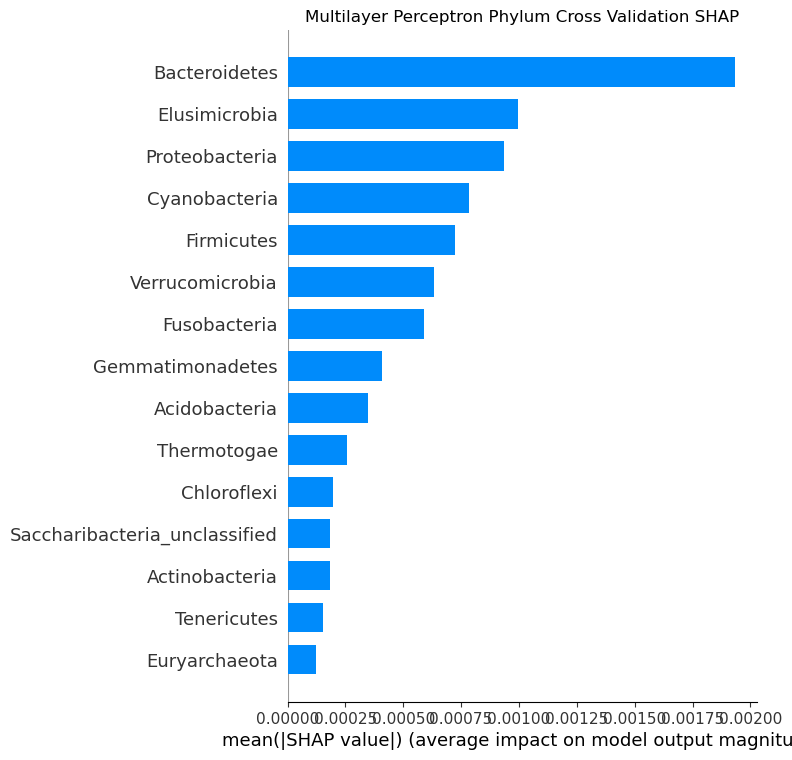

In [96]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('Multilayer Perceptron Phylum Cross Validation SHAP')
plt.show()